In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import math

from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import functools

In [2]:
sorted_nodes = [1, 2, 3, 4, 5, 6, 9, 10, 7, 11, 12, 8, 13, 15, 14]
outchildren = [2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11, 14, 14, 14, -1]
outparents = [-1, 1, 1, 3, 3, 5, 5, 6, 6, 3, 10, 4, 12, 13, 12]
for i in list(zip(sorted_nodes, [sorted_nodes[i] for i in outchildren])):
    print(i)

(1, 3)
(2, 3)
(3, 11)
(4, 8)
(5, 9)
(6, 7)
(9, 10)
(10, 7)
(7, 8)
(11, 12)
(12, 8)
(8, 14)
(13, 14)
(15, 14)
(14, 14)


In [3]:
outparents = [np.inf, 0, 0, 2, 3, 2, 5, 5, 6, 7, 2, 4, 11, 12, 11]
outchildren = [2, 2, 10, 4, 11, 7, 8, 9, 9, 11, 11, 14, 14, 14, -1]
sorted_nodes = [1,2,3,11,12,5,9,6,10,7,4,8,13,15,14]
list(zip(sorted_nodes, [-1] + [sorted_nodes[ix] for ix in outparents[1:]]))

[(1, -1),
 (2, 1),
 (3, 1),
 (11, 3),
 (12, 11),
 (5, 3),
 (9, 5),
 (6, 5),
 (10, 9),
 (7, 6),
 (4, 3),
 (8, 12),
 (13, 8),
 (15, 13),
 (14, 8)]

In [20]:
[i+1 for i in outchildren]

[3, 3, 11, 5, 12, 8, 9, 10, 10, 12, 12, 15, 15, 15, 0]

In [21]:
list(zip(sorted_nodes, [sorted_nodes[ix] for ix in outchildren[:-1]] + [np.inf]))

[(1, 3),
 (2, 3),
 (3, 4),
 (11, 12),
 (12, 8),
 (5, 6),
 (9, 10),
 (6, 7),
 (10, 7),
 (7, 8),
 (4, 8),
 (8, 14),
 (13, 14),
 (15, 14),
 (14, inf)]

In [2]:

def construct_pg_edge(g, prev_pg_id, cur_pg_id, genome_id, sequence_id):
    edge_data=g.get_edge_data(prev_pg_id, cur_pg_id, default=None)
    if edge_data != None:
        edge_data["genomes"].add(genome_id)
        edge_data["sequences"].add(sequence_id)
    else:
        g.add_edge(prev_pg_id, cur_pg_id, genomes=set([genome_id]), sequences=set([sequence_id]))

In [5]:
g = nx.DiGraph()
g.add_nodes_from(range(1,16))
starts = [1, 1, 2, 3, 3, 3, 4, 5, 5, 6, 6, 7, 8, 8, 9, 10, 11, 12, 13, 13, 15]
ends =  [2, 3, 3, 11, 5, 4, 8, 9, 6, 10, 7, 8, 13, 14, 10, 7, 12, 8, 15, 14, 14]
edges = list(zip(starts, ends))
g.add_edges_from(edges)
# g.add_edge(0,2)
# g.add_edge(1,3)
# g.add_edge(2,4)
# g.add_edge(4,5)
# g.add_edge(3,6)
# g.add_edge(5,6)
# g.add_edge(2,7)
# g.add_edge(7,4)
# g.add_edge(7,8)
# g.add_edge(8,5)
# g.add_edge(1,9)
# g.add_edge(9,10)
# g.add_edge(10,11)
# g.add_edge(11,3)

# # g.add_edges_from([(start, start+1) for start in range(9)])
# g.add_edge(1,9, genomes=set(["111.1"]), sequences=set(["sequence.1"]))
# construct_pg_edge(g, 2, 3, "222.2", "sequence.2")

In [ ]:
for edge in g.edges:
    print(edge)
    print(g.edges[edge])

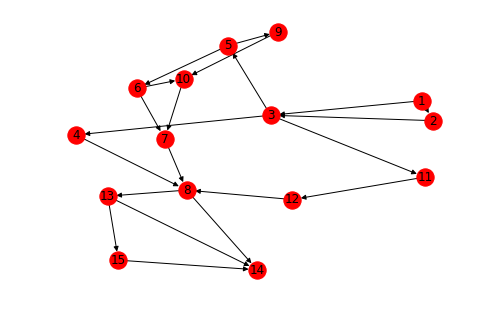

In [4]:
nx.draw(g, with_labels=True)

In [90]:
[i for i in g.predecessors(4)]

[2, 7]

In [29]:
x = [1,2,3]
y = []
x.extend(y)
x

[1, 2, 3]

In [13]:
edges

[(1, 2),
 (1, 3),
 (2, 3),
 (3, 11),
 (3, 5),
 (3, 4),
 (4, 8),
 (5, 9),
 (5, 6),
 (6, 10),
 (6, 7),
 (7, 8),
 (8, 13),
 (8, 14),
 (9, 10),
 (10, 7),
 (11, 12),
 (12, 8),
 (13, 15),
 (13, 14),
 (15, 14)]

In [12]:
super_bubble(g, 1)

([((3, 'Entrance', 2), (14, 'Exit', 14)),
  ((11, 'Entrance', 9), (12, 'Exit', 10))],
 [inf, 0, 0, 2, 2, 4, 4, 5, 5, 2, 9, 3, 11, 12, 11])

In [3]:
def super_bubble(g, start_node):
    
    def validate_superbubble(start_node, end_node):
        start = start_node[2]
        end = end_node[2]
        
        outchild = outchild_rangearr.range_extreme(start, end-1)
        outparent = outparent_rangearr.range_extreme(start+1, end)
        
        if outchild != end:
            return -1
        if outparent == start:
            return start_node
        else:
            if outparent not in total_topo_order_to_node:
                return prev_entrances[outparent]
            elif total_topo_order_to_node[outparent][2] == "Entrance":
                return total_topo_order_to_node[outparent]
            else:
                return prev_entrances[outparent]

    
    def report_superbubble(start, exit):
        super_bubbles = []
        if start is None or exit is None or topo_order[start[0]] >= topo_order[exit[0]]:
            node_candidates.pop()
            return super_bubbles
        
        s = prev_entrances[exit[2]]
        
        while topo_order[s[0]] >= topo_order[start[0]]:
            valid = validate_superbubble(s, exit)
            if (valid == s) or (valid == alternative_entrances[s[2]]) or (valid == -1):
                break
            alternative_entrances[s[2]] = valid
            s = valid
            
        node_candidates.pop()
        
        if valid == s:
            super_bubbles.append((s, exit))
            while node_candidates and node_candidates[-1] is not s:
                if node_candidates[-1][1] == "Exit":
                    next_s = order_to_node[topo_order[s[0]]+1]
                    super_bubbles.extend(report_superbubble(next_s, node_candidates[-1]))
                else:
                    node_candidates.pop()
        return super_bubbles
    
    sorted_nodes = topo_sort(g, start_node)
    node_to_topo = {node:ix for ix, node in enumerate(sorted_nodes)} 
    outparent = []
    outchild = []
    
    node_candidates = []
    prev_entrances = dict()
    
    prev_ent = None
    
    for ix, node in enumerate(sorted_nodes):
        prev_entrances[ix] = prev_ent
        is_entrance = False
        is_exit = False

        topo_orders = [np.inf]
        for parent in g.predecessors(node):
            topo_orders.append(node_to_topo[parent])
            if g.out_degree(parent) == 1:
                is_exit = True
                node_candidates.append((node, "Exit", ix))
        outparent.append(min(topo_orders))
            
        topo_orders = [-1]
        for child in g.successors(node):
            topo_orders.append(node_to_topo[child])
            if g.in_degree(child) == 1:
                is_entrance = True
                node_candidates.append((node, "Entrance", ix))
                prev_ent = (node, "Entrance", ix)
        outchild.append(max(topo_orders))
#         sorted_nodes[ix] = (node, is_entrance, is_exit)

    outparent_rangearr = RangeMinMaxArray(outparent, comp=min)
    outchild_rangearr = RangeMinMaxArray(outchild, comp=max)
    
#     node_candidates, prev_entrances = identify_entrance_exit_nodes(g, start_node)
    alternative_entrances = {i:None for i in prev_entrances}
    topo_order = {i[0]:ix for ix, i in enumerate(node_candidates)}    
    order_to_node = {ix:i for ix, i in enumerate(node_candidates)}    
    total_topo_order_to_node = {i[2]:i for ix, i in enumerate(node_candidates)}    
#     node_candidates, prev_entrances = node_candidates[::-1], prev_entrances[::-1] #Need to operate on them in reverse order
    entrances = [node[0] for node in node_candidates if node[1] == "Entrance"]
    
    super_bubbles = []
    
    while node_candidates:
        if node_candidates[-1][1] == "Entrance":
            node_candidates.pop()
        else:
            super_bubbles.extend(report_superbubble(node_candidates[0], node_candidates[-1]))
    
    return super_bubbles, outparent

In [4]:
# g = nx.readwrite.read_gexf("../test_data/digraph_test.gexf")

In [5]:
def topo_sort(g, start_node):
    nodes = g.nodes()
    node_status = {i:False for i in nodes}
    node_loc = {i:0 for i in nodes}
    sorted_nodes = []

    def topo_sort_helper(g, node):
        if not node_status[node]:
            node_status[node] = True
            for neighbor in g.neighbors(node):
                topo_sort_helper(g, neighbor)
            sorted_nodes.append(node)
    
    topo_sort_helper(g, start_node)
    return sorted_nodes[::-1]

In [25]:
topo_sort(g, 1)

[1, 2, 3, 4, 5, 6, 9, 10, 7, 11, 12, 8, 13, 15, 14]

In [14]:
topo_sort(g, 1)

[1, 2, 3, 4, 5, 6, 9, 10, 7, 11, 12, 8, 13, 15, 14]

In [10]:
@functools.total_ordering
class Node():
    def __init__(self, value, index):
        self.left = None
        self.right = None
        self.parent = None
        self.value = value
        self.index = index
    
    def __eq__(self, other):
        return self.value == other.value and self.index == other.index
    
    def __lt__(self, other):
        return self.value < other.value or (self.value == other.value and self.index < other.index)
    
    def __str__(self):
        return f"Node: {self.value}"
    
class CartesianTree():
    
    """
    Need to make it totally ordered by index (ties broken by index so 
    if it comes first it is smaller)
    """
    
    def __init__(self, arr):
        self.root = Node(arr[0], 0)
        self.size = 1
        self.last_node = self.root
        
        for i in arr[1:]:
            self.insert(i)
        
    def insert(self, data):
        node_index = self.size
        new_node = Node(data, node_index)
        cur_node = self.last_node
        while (cur_node != self.root) and cur_node > new_node:
            cur_node = cur_node.parent
#             print("Now on current node: ", cur_node)
        if cur_node == self.root and cur_node > new_node:
            self.root = new_node
            new_node.left = cur_node
            cur_node.parent = new_node
        else:
            if not cur_node.right is None:
                new_node.left = cur_node.right
                new_node.left.parent = new_node
            cur_node.right = new_node
            new_node.parent = cur_node
        self.last_node = new_node
        self.size += 1
    
    def plot(self, name):
        G = nx.DiGraph()
        def add_nodes(node):
            G.add_node(node.value)
            if not node.parent is None:
                G.add_edge(node.parent.value, node.value)
            if not node.right is None:
                add_nodes(node.right)
            if not node.left is None:
                add_nodes(node.left)
        
        add_nodes(self.root)

        plt.title('draw_networkx')
        p=nx.drawing.nx_pydot.to_pydot(G)
        p.write_png(f"{name}.png")
        
    def get_cartesian_hash(self):
        cart_hash = []
        def update_hash(node):
            cart_hash.append("0")
            if node.left is None:
                cart_hash.append("1")
            else:
                update_hash(node.left)
            
            if node.right is None:
                cart_hash.append("1")
            else:
                update_hash(node.right)
                
        update_hash(self.root)
        return "".join(cart_hash)
    
    def get_in_order(self):
        nodes = []
        def add_node(node):
            if not node.left is None:
                add_node(node.left)
                
            nodes.append(node)
            if not node.right is None:
                add_node(node.right)

        add_node(self.root)
        return nodes    
        
    def get_pairwise_comps(self, comp=min):
        nodes = self.get_in_order()
        arr = np.zeros((len(nodes), len(nodes)))
        
        for i, first in enumerate(nodes):
            cur_extreme = first
            for j, second in enumerate(nodes[i:]):
                cur_extreme = comp(cur_extreme, second)
                arr[i][j+i] = cur_extreme.index
        return arr
                

In [11]:
# def identify_entrance_exit_nodes(g, start_node):
    
#     sorted_nodes = topo_sort(g, start_node)
#     node_candidates = []
#     prev_entrances = []
#     prev_ent = None
    
#     for ix, node in enumerate(sorted_nodes):
#         prev_entrances.append(prev_ent)
#         is_entrance = False
#         is_exit = False
#         for parent in g.predecessors(node):
#             if g.out_degree(parent) == 1:
#                 is_exit = True
#                 node_candidates.append((node, "Exit"))
#                 break
            
#         for child in g.successors(node):
#             if g.in_degree(child) == 1:
#                 is_entrance = True
#                 node_candidates.append((node, "Entrance"))
#                 prev_ent = node
#                 break
#         sorted_nodes[ix] = (node, is_entrance, is_exit)
#     return node_candidates, prev_entrances


            
class RangeMinMaxArray():
    """
    Need to add an array to store the precomputed range extrema for
    all block index queries to make constant lookup of the extrema for
    all blocks fully contained in the query (and then only have three 
    extrema to consider)
    
    Adapted from 
    ftp://nozdr.ru/biblio/kolxoz/Cs/CsLn/Combinatorial%20Pattern%20Matching,%2017%20conf.,%20CPM%202006(LNCS4009,%20Springer,%202006)(ISBN%203540354557)(424s).pdf#page=46
        (Johannes Fischer and Volker Heun)
    https://en.wikipedia.org/wiki/Range_minimum_query
    https://en.wikipedia.org/wiki/Cartesian_tree
    """
    def __init__(self, data, comp=min):
        self.data = data
        self.comp=comp
        self.block_size = int(math.log(len(self.data), 2) // 1)
        self.blocks = [self.data[ix:ix + self.block_size] for ix in range(0,len(self.data),self.block_size)]
        self.block_extrema = [self.comp(arr) for arr in self.blocks]
        
        #Construct long query array
        array_len = len(self.blocks)
        log_len = math.floor(math.log(array_len, 2)) + 1
        self.long_query_array = np.zeros((array_len, log_len))
        for j in range(log_len):
            for ix, i in enumerate(self.block_extrema):
                if j == 0:
                    self.long_query_array[ix][0] = min(self.block_extrema[ix:ix+1])
                else:
                    second_index = ix + 2**(j-1)
                    if second_index >= array_len:
                        self.long_query_array[ix][j] = self.long_query_array[ix][j-1]
                    else:
                        self.long_query_array[ix][j] = min(self.long_query_array[ix][j-1], \
                                              self.long_query_array[second_index][j-1])

        self.build_cartesian_map()
        
    def __iter__(self):
        for i in self.data:
            yield i
            
    def __getitem__(self, key):
        return self.data[key]
    
    def get_pairwise_block_comps(self):
        
        for i, first in enumerate(self.block_extrema):
            cur_extreme = first
            for j, second in enumerate(nodes[i:]):
                cur_extreme = self.comp(cur_extreme, second)
                arr[i][j+i] = cur_extreme.index
        return arr
        
    def get_long_block_extrema(self, i, j):
        
        if i == j:
            return self.block_extrema[i]
        
        l = math.floor(math.log(j-i, 2))
        return self.comp(self.long_query_array[i][l], self.long_query_array[j - (2**l) +1][l])
            
    def build_cartesian_map(self):
#         import pdb; pdb.set_trace()
        
        cartesian_map = dict() #I know this breaks the linear time algorithm (worst case is O(n) where the 
        #wikipedia article https://en.wikipedia.org/wiki/Range_minimum_query recommends an array of
        #size log n, but "key in dict" in constant on average by https://wiki.python.org/moin/TimeComplexity
        #So I'm saving some space and "readability")

        block_id_to_cart_hash = dict()
        for ix, block in enumerate(self.blocks):
            cart_tree = CartesianTree(block)
            cart_hash = cart_tree.get_cartesian_hash()
            if not cart_hash in cartesian_map:
                cartesian_map[cart_hash] = cart_tree.get_pairwise_comps(comp=self.comp)
            block_id_to_cart_hash[ix] = cart_hash 

        self.cartesian_map, self.block_id_to_cart_hash = cartesian_map, block_id_to_cart_hash
        
    def range_extreme(self, left, right):
        print(f"\t{self.data[left:right+1]}")
#         right = right -1 #To account for standard python indexing
#         import pdb; pdb.set_trace()
#         print(f"Left: {left}\tRight: {right}")
        if left > right:
            raise ValueError("Left index must be less than or equal to the right index.")
        extrema = []
        left_block = math.floor(left/self.block_size)
        right_block = math.floor(right/self.block_size)
        
        if right_block - left_block > 1: #So there is at least one block completely between them
            extrema.append(self.get_long_block_extrema(left_block+1, right_block-1))
        
        #If the indices are in the same block, both left_extrema and right_extrema are the same
        
        left_block_offset = left_block * self.block_size
        left_block_left, left_block_right = (left - left_block_offset, \
                              min(self.block_size - 1, right - left_block_offset))
        
        left_block_cart_hash = self.block_id_to_cart_hash[left_block]
        left_extrema_index = int(self.cartesian_map[left_block_cart_hash][left_block_left][left_block_right])
        left_extrema = self.blocks[left_block][left_extrema_index]
        
        right_block_offset = right_block * self.block_size
        right_block_left, right_block_right = (max(0, left - right_block_offset), \
                                               right - right_block_offset)
        
        right_block_cart_hash = self.block_id_to_cart_hash[right_block]
        right_extrema_index = int(self.cartesian_map[right_block_cart_hash][right_block_left][right_block_right])
        right_extrema = self.blocks[right_block][right_extrema_index]
        
        extrema.append(left_extrema)
        extrema.append(right_extrema)
        
        return self.comp(extrema)
            
def blockify_array(array):
    block_size = int(math.log(len(array), 2) // 1)
    blocks = [array[ix:ix + block_size] for ix in range(0,len(array),block_size)]
    block_minima = [min(arr) for arr in blocks]
    return blocks, block_minima

def build_cartesian_map(blocks, comp=min):
    """
    Don't quite have the implementation correct I think because this seems to do
    log^2(n) operations n/log(n) times which is nlogn instead of log^2 in time
    """
    cartesian_map = dict() #I know this breaks the linear time algorithm (worst case is O(n) where the 
    #wikipedia article https://en.wikipedia.org/wiki/Range_minimum_query recommends an array of
    #size log n, but "key in dict" in constant on average by https://wiki.python.org/moin/TimeComplexity
    #So I'm saving some space and "readability")

    block_id_to_cart_hash = dict()
    for ix, block in enumerate(blocks):
        cart_tree = CartesianTree(block)
        cart_hash = cart_tree.get_cartesian_hash()
        if not cart_hash in cartesian_map:
            cartesian_map[cart_hash] = cart_tree.get_pairwise_comps(comp=comp)
        block_id_to_cart_hash[ix] = cart_hash 

    return cartesian_map, block_id_to_cart_hash
    
def calc_min_parent():
    pass
def calc_max_child():
    pass
def build_cartesian_tree_array(arr):
    pass

In [12]:
arr = [2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11, 14, 14, 14, -1]
test = RangeMinMaxArray(arr)

test.range_extreme(0,13)

	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11, 14, 14, 14]


2

In [10]:
from numpy.random import randint

In [11]:
np.random.seed(42)
arr = [9,3,7,1,8,12,10,20,15,18,5,13,22,29,33,0,-15,3,5,6,7,8,9,0,10,123]
test = RangeMinMaxArray(arr)

# test.range_extreme(0,22)
# min(arr[0:23])

s = 0
for num_arr in range(300, 600, 50):
# for num_arr in range(3, 10):
    arr = randint(0,num_arr*500, num_arr)
    test = RangeMinMaxArray(arr)

    for i in range(len(arr)):
        for j in range(i+1,len(arr)+1):
            mi = min(arr[i:j])
            result = test.range_extreme(i,j-1)

    #         print(f"{mi == result}\tStart: {i} {arr[i]}\tStop: {j-1} {arr[j-1]}\tMin: {mi}\tResult: {result}")
            s += mi != result

s
    

0

In [13]:
arr = [2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11, 14, 14, 14, -1] #[9, 5, 7, 11, 6, 4, 7, 8, 11, 10, 11, 14, 15, 16, 0]
test = RangeMinMaxArray(arr)
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        print(f"{i}, {j}")
        print(f"\t{arr[i:j+1]}")
        mi = min(arr[i:j+1])
        result = test.range_extreme(i,j)
        print(f"\tMin is {mi}, result is {result}: {mi==result}")

0, 1
	[2, 2]
	[2, 2]
	Min is 2, result is 2: True
0, 2
	[2, 2, 9]
	[2, 2, 9]
	Min is 2, result is 2: True
0, 3
	[2, 2, 9, 11]
	[2, 2, 9, 11]
	Min is 2, result is 2: True
0, 4
	[2, 2, 9, 11, 6]
	[2, 2, 9, 11, 6]
	Min is 2, result is 2: True
0, 5
	[2, 2, 9, 11, 6, 8]
	[2, 2, 9, 11, 6, 8]
	Min is 2, result is 2: True
0, 6
	[2, 2, 9, 11, 6, 8, 7]
	[2, 2, 9, 11, 6, 8, 7]
	Min is 2, result is 2: True
0, 7
	[2, 2, 9, 11, 6, 8, 7, 8]
	[2, 2, 9, 11, 6, 8, 7, 8]
	Min is 2, result is 2: True
0, 8
	[2, 2, 9, 11, 6, 8, 7, 8, 11]
	[2, 2, 9, 11, 6, 8, 7, 8, 11]
	Min is 2, result is 2: True
0, 9
	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10]
	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10]
	Min is 2, result is 2: True
0, 10
	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11]
	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11]
	Min is 2, result is 2: True
0, 11
	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11, 14]
	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11, 14]
	Min is 2, result is 2: True
0, 12
	[2, 2, 9, 11, 6, 8, 7, 8, 11, 10, 11, 14, 14]
	[2, 2, 9, 11, 6, 8, 7, 8, 

In [18]:
arr[14]

-1

In [ ]:

for i in range(len(test_arr)):
    for j in range(i+2,len(test_arr)+1):
        mi = min(test_arr[i:j])
        result = get_dynamic_min(long_query_array,i,j-1)
        print(f"{mi == result}\tStart: {i} {test_arr[i]}\tStop: {j-1} {test_arr[j-1]}\tMin: {mi}\tResult: {result}")
    

In [35]:
x=[1,2,3,4]
x[0:1]

[1]

In [56]:
math.log(len(arr), 2) // 1

3.0

In [123]:
arr[5:0]

[]

In [117]:
arr = [9,3,7,1,8,12,10,20,15,18,5,13,22,29,33,]
blocks, block_minima = blockify_array(arr)
build_cartesian_map(blocks, comp=min)

({'0011011': array([[9., 3., 3.],
         [0., 3., 3.],
         [0., 0., 7.]]),
  '0101011': array([[ 1.,  1.,  1.],
         [ 0.,  8.,  8.],
         [ 0.,  0., 12.]]),
  '0100111': array([[10., 10., 10.],
         [ 0., 20., 15.],
         [ 0.,  0., 15.]])},
 {0: '0011011', 1: '0101011', 2: '0100111', 3: '0011011', 4: '0101011'})

Node: 9
Node: 9
0 0
Node: 3
0 1
Node: 7
0 2
Node: 1
0 3
Node: 3
Node: 3
1 0
Node: 7
1 1
Node: 1
1 2
Node: 7
Node: 7
2 0
Node: 1
2 1
Node: 1
Node: 1
3 0


array([[9., 3., 3., 1.],
       [0., 3., 3., 1.],
       [0., 0., 7., 1.],
       [0., 0., 0., 1.]])

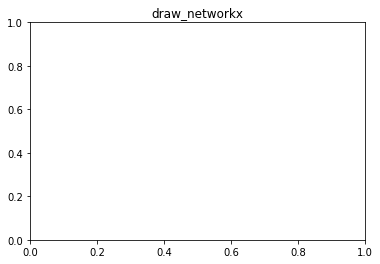

In [103]:
arr = [9,3,7,1] #,8,12,10,20,15,18,5]
test = CartesianTree(arr)
test.plot("small")
test.get_pairwise_comps()

In [101]:
arr = np.zeros((4, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [72]:
2**11

2048

In [28]:
def print_tree(tree):
    if not tree.left is None:
        print_tree(tree.left)
    print(tree)
    if not tree.right is None:
        print_tree(tree.right)
        
print_tree(test.root)

Node: 9
Node: 3
Node: 7
Node: 1
Node: 8
Node: 12
Node: 10
Node: 20
Node: 15
Node: 18
Node: 5


In [ ]:
identify_entrance_exit_nodes(g, 0)
